In [2]:
from PDMX import MusicRender


In [8]:
music = MusicRender()
path = "./data/b/b/Qmbb4MXzbgmP9cQzUaXFK9Mp5pMK4UCwrM9YKuS2pF3mt6.json"
path = "PDMX data" + path.lstrip(".")
music.load(path = path)

music

MusicRender(metadata=Metadata(schema_version='0.2', title='"Paddies Evermore"              (air)             0262', creators=["after Chief  F. O'Neill\nwith spirit"], source_filename='Qmbb4MXzbgmP9cQzUaXFK9Mp5pMK4UCwrM9YKuS2pF3mt6.mscz', source_format='musescore'), resolution=480, tempos=[Tempo(time=0, qpm=130.0002, text='<sym>metNoteQuarterUp</sym> = 130', measure=1)], key_signatures=[KeySignature(time=0, measure=1, root=2, mode='major', fifths=2, root_str='D')], time_signatures=[TimeSignature(time=0, measure=1, numerator=6, denominator=8)], barlines=[Barline(time=0, measure=1, subtype='single'), Barline(time=1440, measure=2, subtype='single'), Barline(time=2880, measure=3, subtype='single'), ...], beats=[Beat(time=0, measure=1, is_downbeat=True), Beat(time=240, measure=1, is_downbeat=False), Beat(time=480, measure=1, is_downbeat=False), ...], annotations=[Annotation(time=30960, measure=22, annotation=Fermata(is_fermata_above=True))], tracks=[Track(program=0, is_drum=False, notes=[Not

In [12]:
path

'PDMX data/data/b/b/Qmbb4MXzbgmP9cQzUaXFK9Mp5pMK4UCwrM9YKuS2pF3mt6.json'

In [11]:
from PDMX.modeling import generated_to_audio
generated_to_audio.generated_to_audio(path, "test.mp4")

In [42]:
import pandas as pd
import json
paths = pd.read_csv("PDMX data/subset_paths/all.txt", header=None)


path = paths[0][0]
# path = "./data/b/b/Qmbb4MXzbgmP9cQzUaXFK9Mp5pMK4UCwrM9YKuS2pF3mt6.json"
path = "PDMX data" + path.lstrip(".")

with open(path, 'r') as file:
    data = json.load(file)

data.keys()
data

{'metadata': {'__class__.__name__': 'Metadata',
  'schema_version': '0.2',
  'title': 'I Shall Be No Stranger There',
  'creators': ['William James Kirkpatrick'],
  'copyright': 'Public Domain\nCourtesy of the Cyber Hymnal™',
  'collection': None,
  'source_filename': 'QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHGmR3JFtLAPyC.mscz',
  'source_format': 'musescore',
  'subtitle': None},
 'resolution': 480,
 'tempos': [{'__class__.__name__': 'Tempo',
   'time': 0,
   'qpm': 100.0002,
   'measure': 1,
   'text': '<sym>metNoteQuarterUp</sym> = 100'}],
 'key_signatures': [{'__class__.__name__': 'KeySignature',
   'time': 0,
   'root': 4,
   'mode': 'major',
   'fifths': 4,
   'root_str': 'E',
   'measure': 1}],
 'time_signatures': [{'__class__.__name__': 'TimeSignature',
   'time': 0,
   'numerator': 3,
   'denominator': 4,
   'measure': 1}],
 'beats': [{'__class__.__name__': 'Beat',
   'time': 0,
   'measure': 1,
   'is_downbeat': True},
  {'__class__.__name__': 'Beat',
   'time': 480,
   'measure': 1

In [17]:
len(data["tracks"])
data["song_length"]

36001

In [18]:
data["key_signatures"]

[{'__class__.__name__': 'KeySignature',
  'time': 0,
  'root': 2,
  'mode': 'major',
  'fifths': 2,
  'root_str': 'D',
  'measure': 1}]

In [38]:
import json
import xml.etree.ElementTree as ET
from xml.dom import minidom
import datetime

# # Load JSON data
# with open('music_data.json', 'r') as f:
#     data = json.load(f)

def get_note_type(duration):
    if duration == 480:
        return "whole"
    elif duration == 240:
        return "quarter"
    elif duration == 120:
        return "eighth"
    elif duration == 60:
        return "16th"
    elif duration == 30:
        return "32nd"
    elif duration == 15:
        return "64th"
    else:
        return "quarter"  # Default to quarter if no match is found

def create_music_xml(data):
    score_partwise = ET.Element("score-partwise", version="3.1")
    
    # Add metadata
    work = ET.SubElement(score_partwise, "work")
    ET.SubElement(work, "work-title").text = data["metadata"]["title"]
    
    identification = ET.SubElement(score_partwise, "identification")
    creator = ET.SubElement(identification, "creator", type="composer")
    creator.text = data["metadata"]["creators"][0]
    
    # Encoding information
    encoding = ET.SubElement(identification, "encoding")
    ET.SubElement(encoding, "software").text = "Custom Converter"
    ET.SubElement(encoding, "encoding-date").text = str(datetime.date.today())
    for element, attr, value in [("accidental", "type", "yes"), ("beam", "type", "yes"),
                                 ("print", "attribute", "new-page", "value", "yes"),
                                 ("print", "attribute", "new-system", "value", "yes"),
                                 ("stem", "type", "yes")]:
        ET.SubElement(encoding, "supports", element=element, type=attr, value=value)
    
    # Part list
    part_list = ET.SubElement(score_partwise, "part-list")
    score_part = ET.SubElement(part_list, "score-part", id="P1")
    part_name = ET.SubElement(score_part, "part-name")
    part_name.text = "Piano"
    ET.SubElement(score_part, "part-abbreviation").text = "Pno."
    instrument = ET.SubElement(score_part, "score-instrument", id="P1-I1")
    ET.SubElement(instrument, "instrument-name").text = "Piano"
    midi_device = ET.SubElement(score_part, "midi-device", id="P1-I1", port="1")
    midi_instrument = ET.SubElement(score_part, "midi-instrument", id="P1-I1")
    ET.SubElement(midi_instrument, "midi-channel").text = "1"
    ET.SubElement(midi_instrument, "midi-program").text = "1"
    ET.SubElement(midi_instrument, "volume").text = "78.7402"
    ET.SubElement(midi_instrument, "pan").text = "0"
    
    # Create part for measures
    part = ET.SubElement(score_partwise, "part", id="P1")

    # Process each measure
    for measure_index in range(1, 10):
        measure_element = ET.SubElement(part, "measure", number=str(measure_index), width="374.91")

        # Add system layout
        print_el = ET.SubElement(measure_element, "print")
        system_layout = ET.SubElement(print_el, "system-layout")
        system_margins = ET.SubElement(system_layout, "system-margins")
        ET.SubElement(system_margins, "left-margin").text = "21.00"
        ET.SubElement(system_margins, "right-margin").text = "0.00"
        ET.SubElement(system_layout, "top-system-distance").text = "170.00"
        
        staff_layout = ET.SubElement(print_el, "staff-layout", number="2")
        ET.SubElement(staff_layout, "staff-distance").text = "65.00"
        
        # Add attributes (time and key signatures, clef)
        attributes = ET.SubElement(measure_element, "attributes")
        ET.SubElement(attributes, "divisions").text = "4"  # Assuming a base division of 4

        # Key signature
        key_signature_data = next((ks for ks in data["key_signatures"] if ks["measure"] == measure_index), None)
        if key_signature_data:
            key = ET.SubElement(attributes, "key")
            ET.SubElement(key, "fifths").text = str(key_signature_data["fifths"])
        
        # Time signature
        time_signature_data = next((ts for ts in data["time_signatures"] if ts["measure"] == measure_index), None)
        if time_signature_data:
            time = ET.SubElement(attributes, "time")
            ET.SubElement(time, "beats").text = str(time_signature_data["numerator"])
            ET.SubElement(time, "beat-type").text = str(time_signature_data["denominator"])

        # Clefs
        ET.SubElement(attributes, "staves").text = "2"
        clef1 = ET.SubElement(attributes, "clef", number="1")
        ET.SubElement(clef1, "sign").text = "G"
        ET.SubElement(clef1, "line").text = "2"
        
        clef2 = ET.SubElement(attributes, "clef", number="2")
        ET.SubElement(clef2, "sign").text = "F"
        ET.SubElement(clef2, "line").text = "4"

        # Tempo
        tempo_data = next((tempo for tempo in data["tempos"] if tempo["measure"] == measure_index), None)
        if tempo_data:
            direction = ET.SubElement(measure_element, "direction", placement="above")
            direction_type = ET.SubElement(direction, "direction-type")
            metronome = ET.SubElement(direction_type, "metronome", parentheses="no", default_x="-64.33", relative_y="20.00")
            ET.SubElement(metronome, "beat-unit").text = "quarter"
            ET.SubElement(metronome, "per-minute").text = str(int(tempo_data["qpm"]))
            ET.SubElement(direction, "sound", tempo=str(int(tempo_data["qpm"])))

        # Notes
        notes_in_measure = [note for note in data["tracks"][0]["notes"] if note["measure"] == measure_index]
        for note_data in notes_in_measure:
            note_element = ET.SubElement(measure_element, "note")
            
            # Pitch information
            pitch = ET.SubElement(note_element, "pitch")
            ET.SubElement(pitch, "step").text = note_data["pitch_str"][0]
            ET.SubElement(pitch, "octave").text = str(note_data["pitch"] // 12 - 1)
            
            # Duration, voice, and type
            ET.SubElement(note_element, "duration").text = str(note_data["duration"])
            ET.SubElement(note_element, "voice").text = "1"
            note_type = get_note_type(note_data["duration"])
            ET.SubElement(note_element, "type").text = note_type
            
            # Stem direction for visibility
            ET.SubElement(note_element, "stem").text = "down"
    
    # Convert to XML string and save
    rough_string = ET.tostring(score_partwise, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    pretty_xml_as_string = reparsed.toprettyxml(indent="  ")
    
    with open("music_score.xml", "w") as xml_file:
        xml_file.write(pretty_xml_as_string)

create_music_xml(data)
print("MusicXML file created as 'music_score.xml'")

ValueError: too many values to unpack (expected 3)

In [35]:
from music21 import *

s = corpus.parse('bach/bwv65.2.xml')


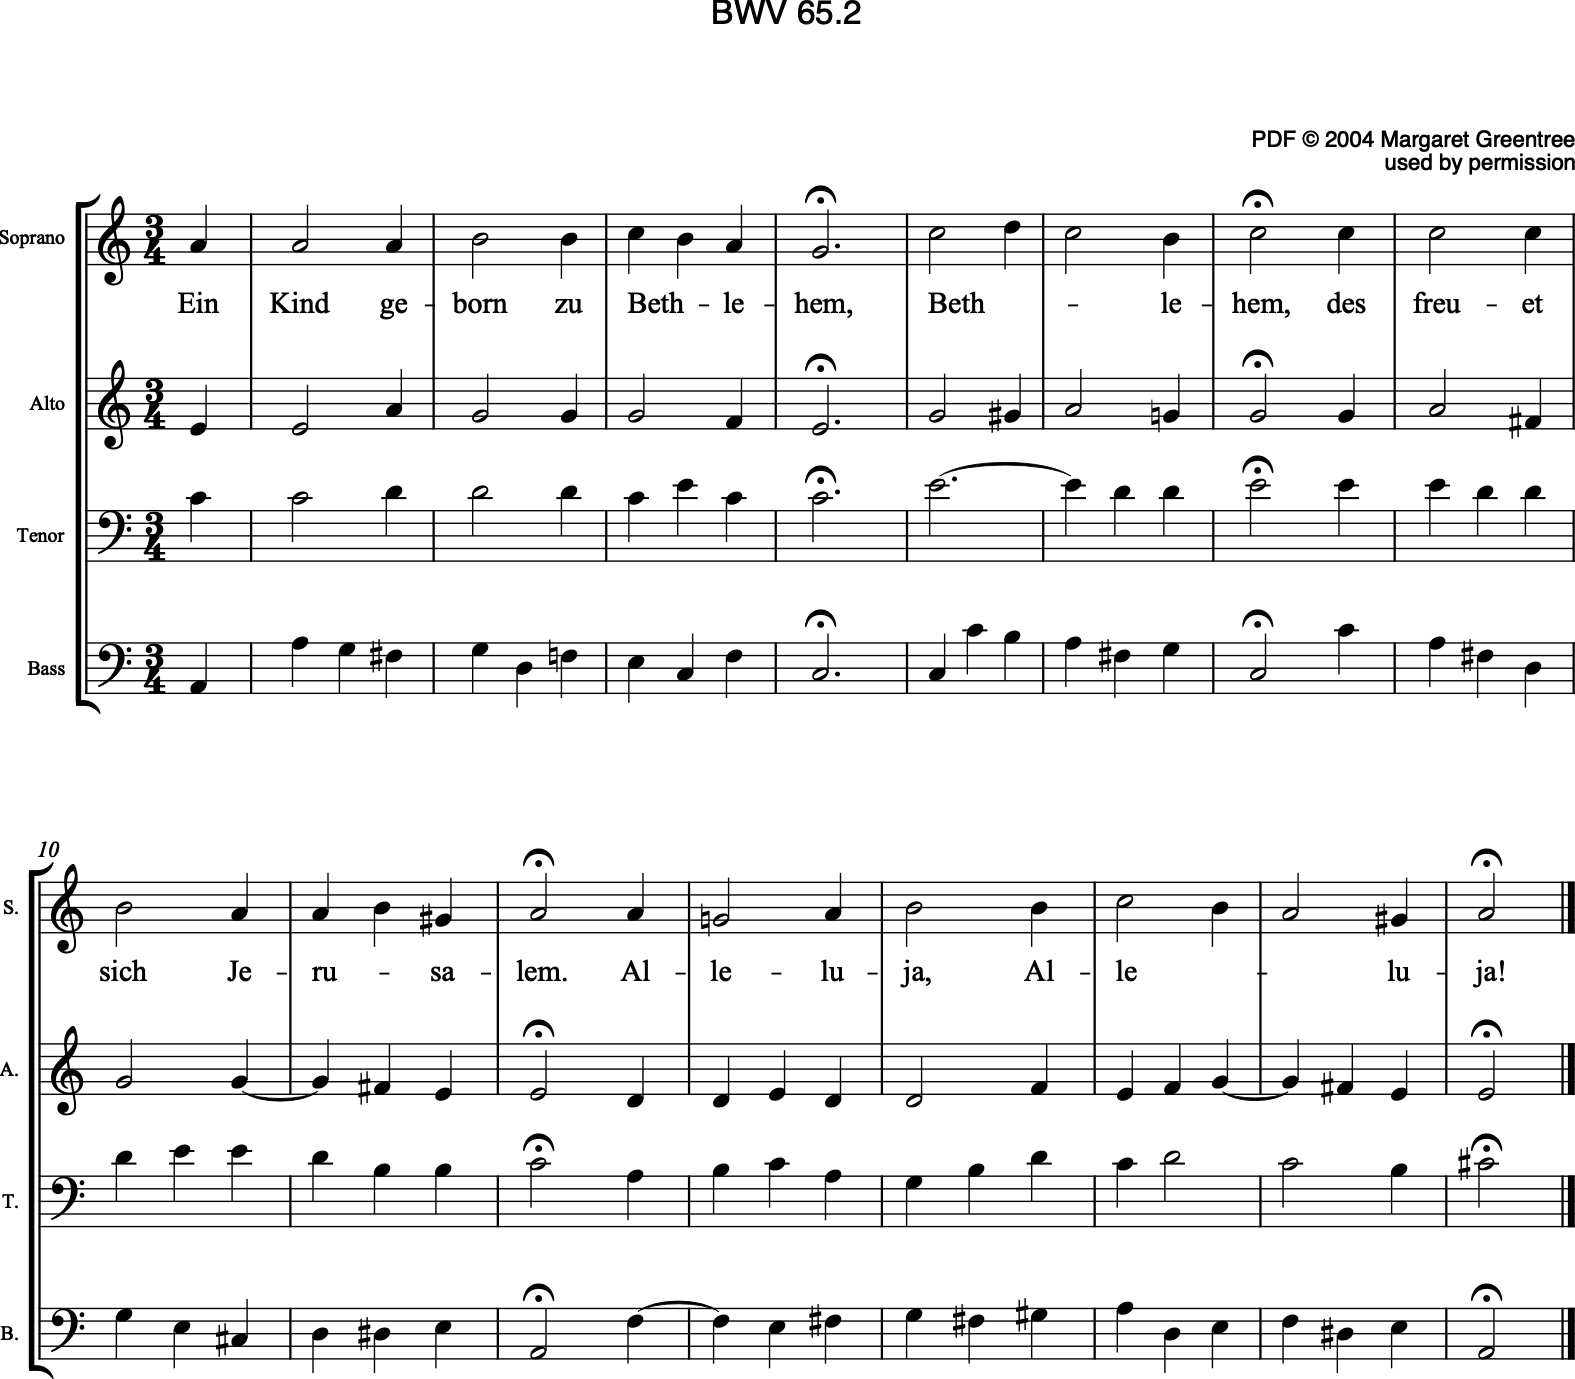

In [36]:
s.show()

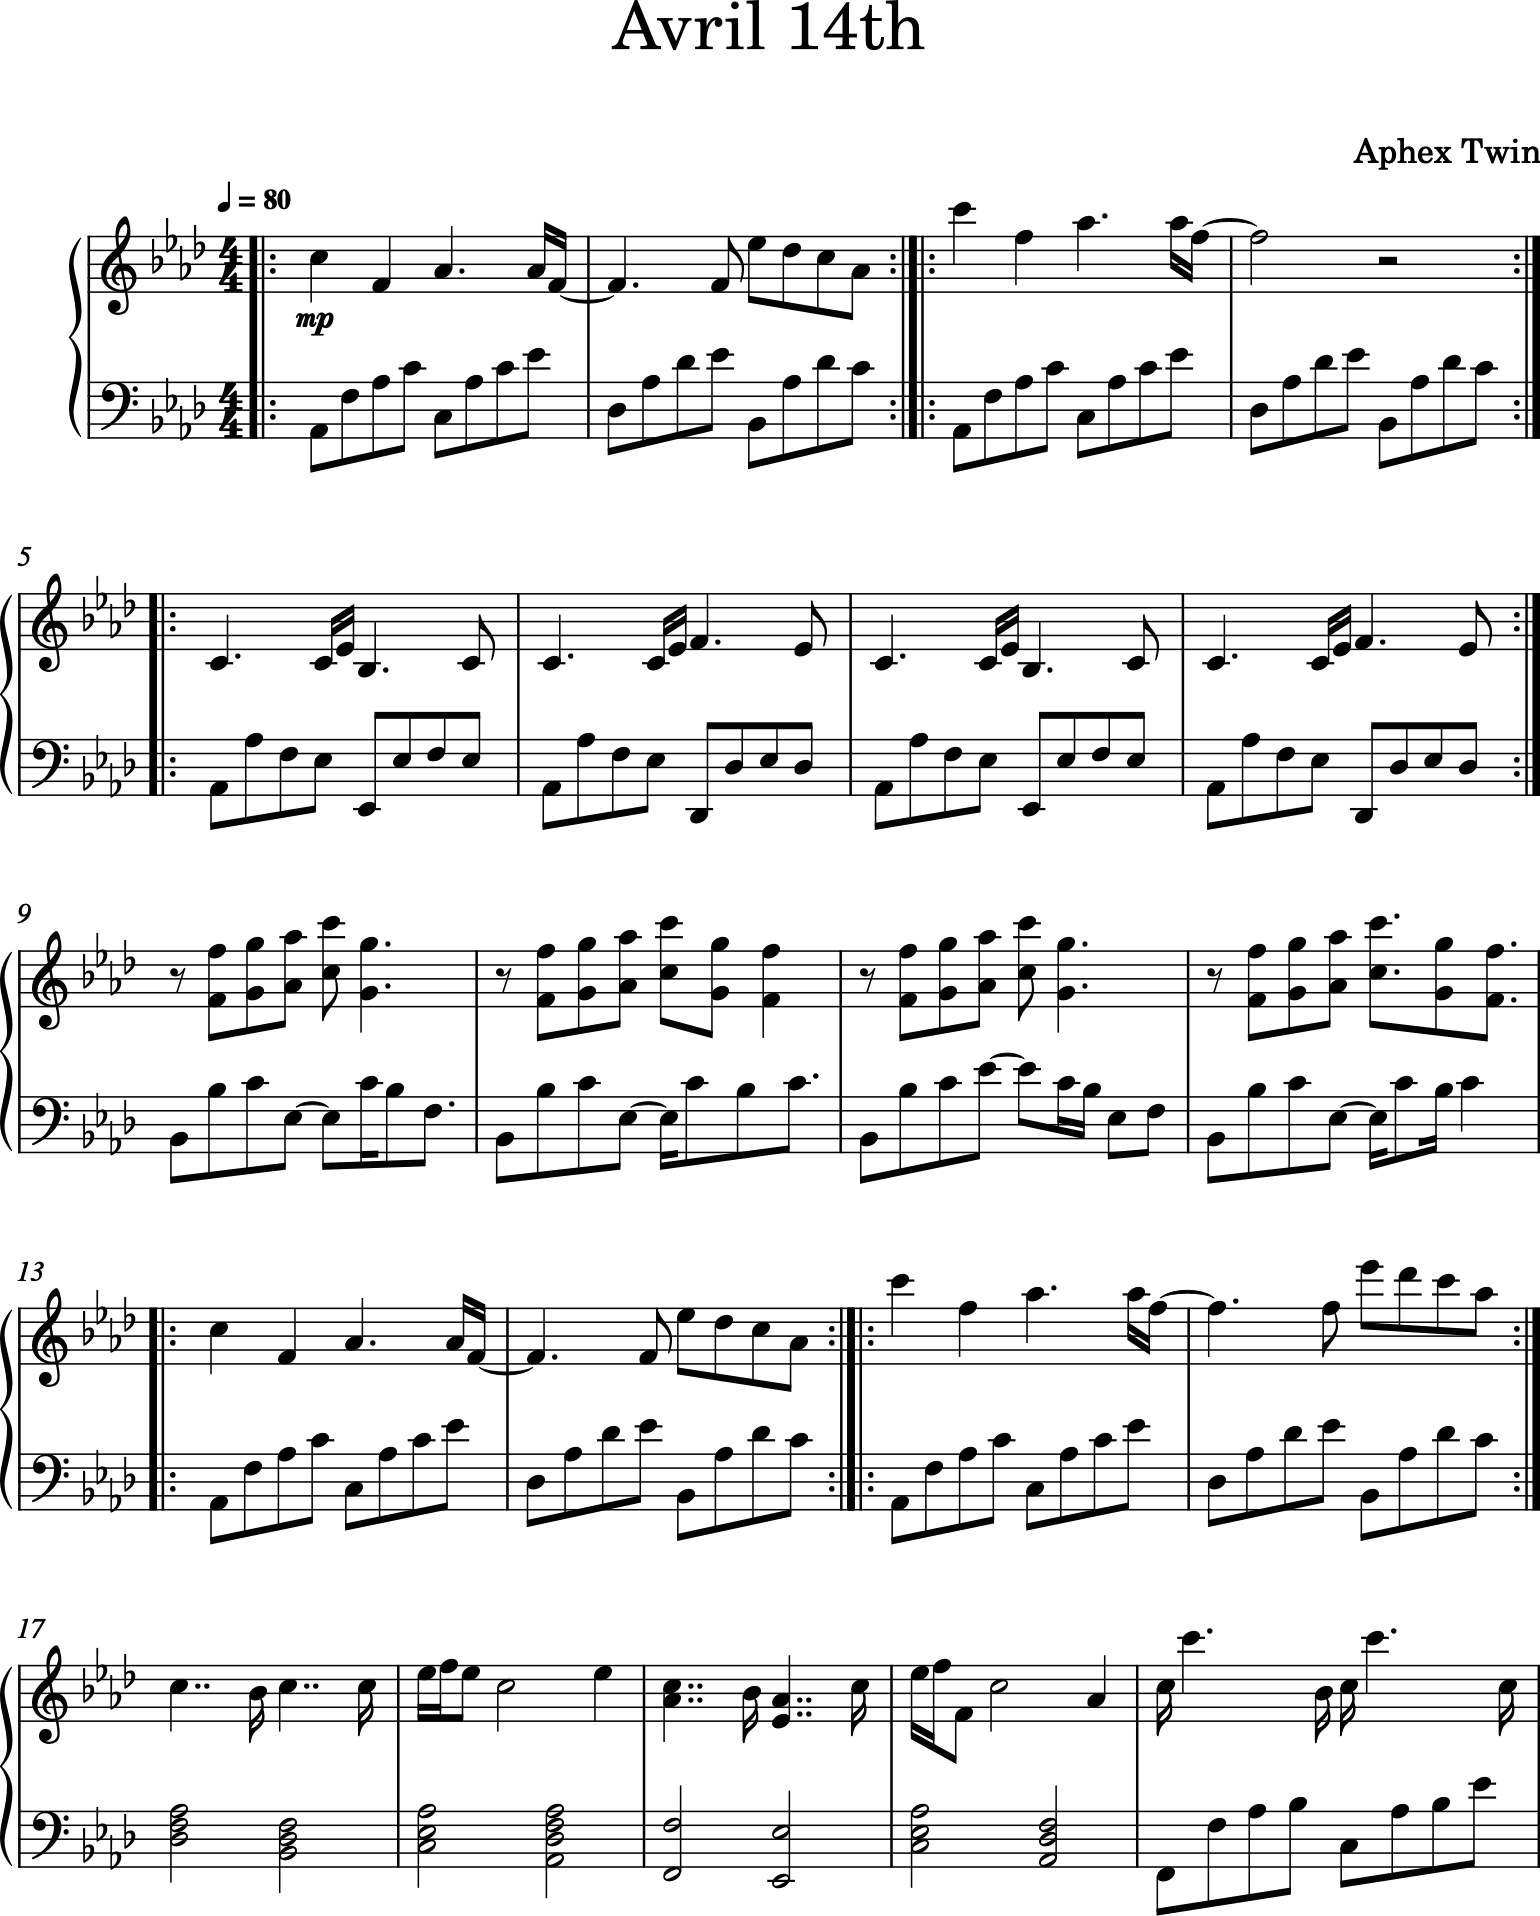

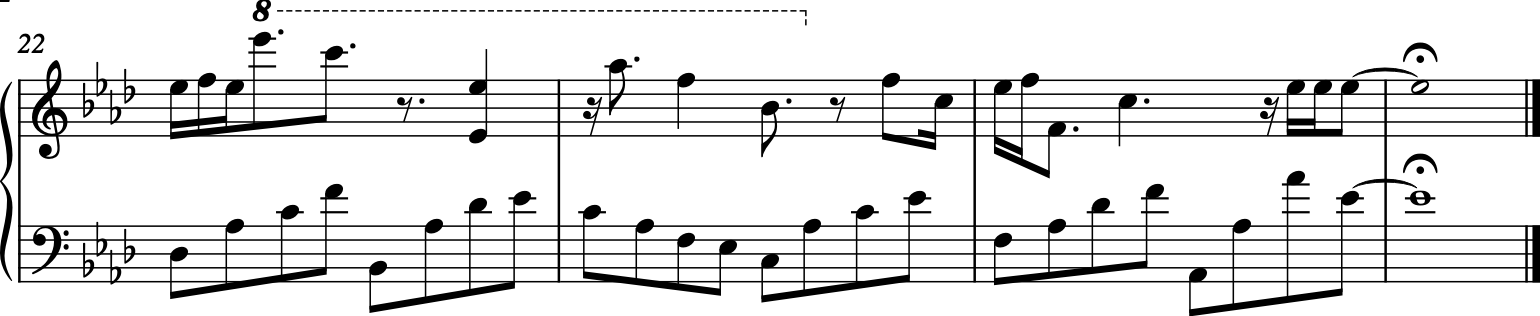

In [43]:
score = converter.parse('avril_14th.xml')

# Display the score
score.show()

In [1]:
import pandas as pd
import json
from tqdm import tqdm

paths = pd.read_csv("PDMX data/subset_paths/all.txt")
len(paths)

254077

In [7]:
def load_song(file_path):
    """Load a single song from a JSON file."""
    try:
        with open(file_path, 'r') as f:
            song = json.load(f)
        return song
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def create_events(notes):
    """
    Given a list of notes, create a list of events.
    Each event is a dictionary with 'time' and 'notes' (list of notes at that time).
    """
    events_dict = {}
    for note in notes:
        time = note['time']
        if time not in events_dict:
            events_dict[time] = []
        events_dict[time].append(note)
    # Create a list of events, sorted by time
    events = [{'time': time, 'notes': events_dict[time]} for time in sorted(events_dict.keys())]
    return events

In [ ]:
file_path = paths['path'][0]  # Assuming 'path' is the column name in your DataFrame
file_path = "PDMX data" + file_path.lstrip(".")
song = load_song(file_path)
song_title = song.get('metadata', {}).get('title', 'Unknown Title')
for track in song.get('tracks', []):
    track_notes = track.get('notes', [])
    song_events = create_events(track_notes)


2

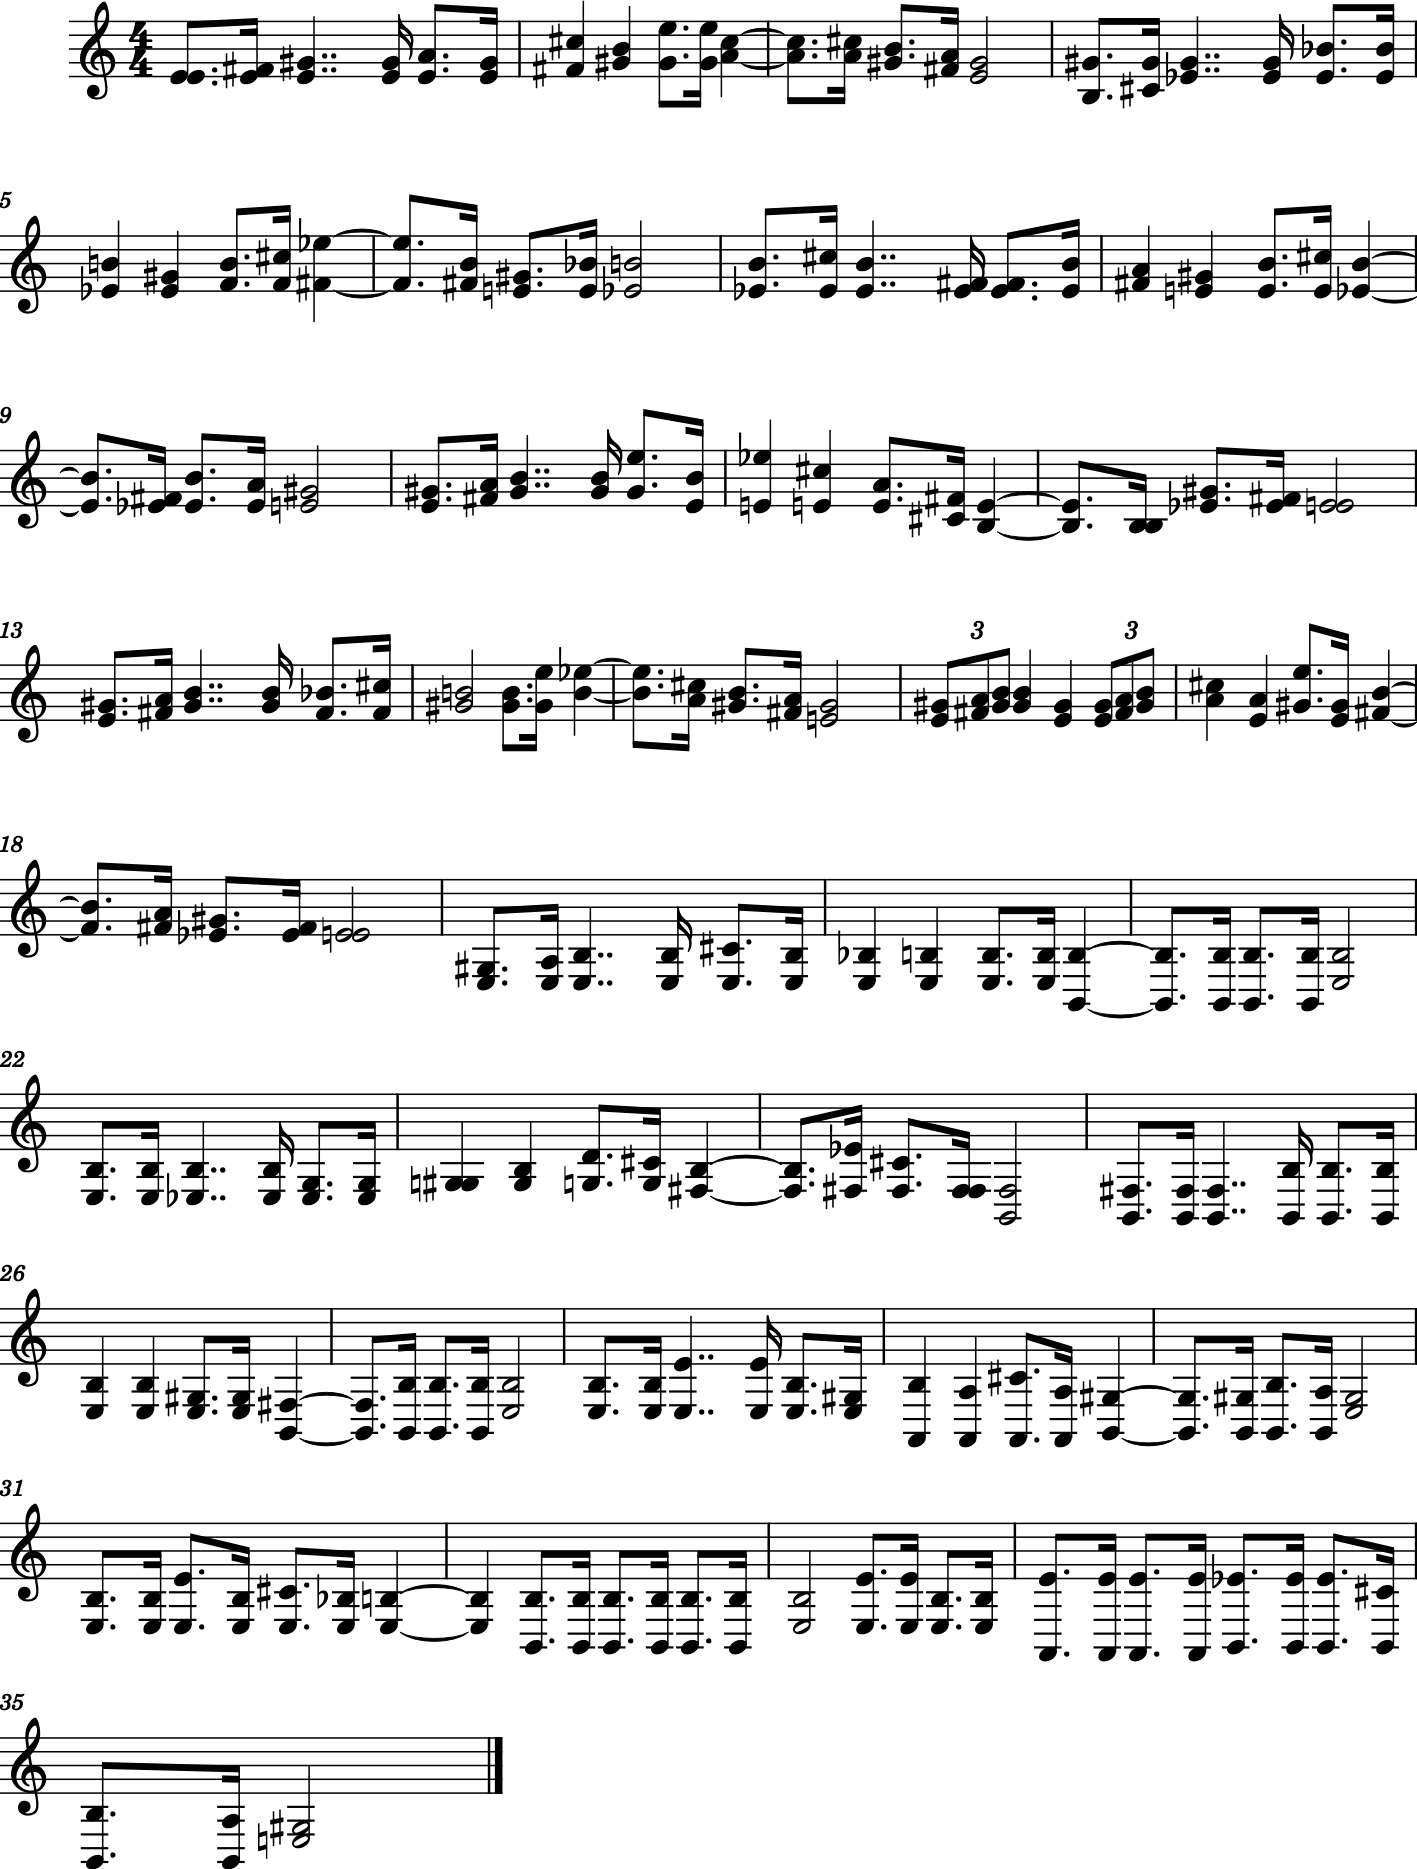

In [20]:
pattern_events = [{'time': 2760,
  'notes': [{'__class__.__name__': 'Note',
    'time': 2760,
    'pitch': 64,
    'duration': 120,
    'velocity': 64,
    'pitch_str': 'E',
    'measure': 2,
    'is_grace': False},
   {'__class__.__name__': 'Note',
    'time': 2760,
    'pitch': 68,
    'duration': 120,
    'velocity': 64,
    'pitch_str': 'G#',
    'measure': 2,
    'is_grace': False}]},
 {'time': 2880,
  'notes': [{'__class__.__name__': 'Note',
    'time': 2880,
    'pitch': 66,
    'duration': 480,
    'velocity': 64,
    'pitch_str': 'F#',
    'measure': 3,
    'is_grace': False},
   {'__class__.__name__': 'Note',
    'time': 2880,
    'pitch': 73,
    'duration': 480,
    'velocity': 64,
    'pitch_str': 'C#',
    'measure': 3,
    'is_grace': False}]},
 {'time': 3360,
  'notes': [{'__class__.__name__': 'Note',
    'time': 3360,
    'pitch': 68,
    'duration': 480,
    'velocity': 64,
    'pitch_str': 'G#',
    'measure': 3,
    'is_grace': False},
   {'__class__.__name__': 'Note',
    'time': 3360,
    'pitch': 71,
    'duration': 480,
    'velocity': 64,
    'pitch_str': 'B',
    'measure': 3,
    'is_grace': False}]},
 {'time': 3840,
  'notes': [{'__class__.__name__': 'Note',
    'time': 3840,
    'pitch': 68,
    'duration': 360,
    'velocity': 64,
    'pitch_str': 'G#',
    'measure': 3,
    'is_grace': False},
   {'__class__.__name__': 'Note',
    'time': 3840,
    'pitch': 76,
    'duration': 360,
    'velocity': 64,
    'pitch_str': 'E',
    'measure': 3,
    'is_grace': False}]},
 {'time': 4200,
  'notes': [{'__class__.__name__': 'Note',
    'time': 4200,
    'pitch': 68,
    'duration': 120,
    'velocity': 64,
    'pitch_str': 'G#',
    'measure': 3,
    'is_grace': False},
   {'__class__.__name__': 'Note',
    'time': 4200,
    'pitch': 76,
    'duration': 120,
    'velocity': 64,
    'pitch_str': 'E',
    'measure': 3,
    'is_grace': False}]}]

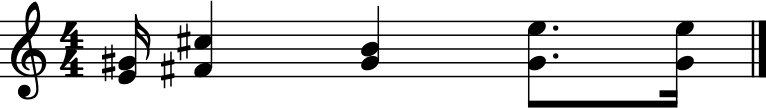

In [22]:
s = stream.Stream()

data = pattern_events

TICKS_PER_QUARTER = 480  # Adjust this based on your time resolution

for item in data:
    notes_list = item['notes']
    if len(notes_list) > 1:
        pitches = []
        for n in notes_list:
            midi_pitch = n['pitch']
            m21_pitch = note.Note()
            m21_pitch.pitch.midi = midi_pitch
            pitches.append(m21_pitch.pitch)
        dur = notes_list[0]['duration']
        chord_notes = chord.Chord(pitches)
        chord_notes.duration = duration.Duration(dur / TICKS_PER_QUARTER)
        s.append(chord_notes)
    else:
        n = notes_list[0]
        midi_pitch = n['pitch']
        dur = n['duration']
        m21_note = note.Note()
        m21_note.pitch.midi = midi_pitch
        m21_note.duration = duration.Duration(dur / TICKS_PER_QUARTER)
        s.append(m21_note)

s.show()